In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [151]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Data Cleaning

In [152]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [153]:
df.shape

(891, 12)

In [154]:
def fetch_count_and_percent_of_null(data):
    nv = data.isnull().sum()
    nv = nv[nv>0]
    res = pd.DataFrame({'feature':nv.index,'count_null':nv.values,'percent_null':(nv.values/data.shape[0])*100})
    res = res.sort_values('percent_null',ascending=False)
    return res

In [155]:
fetch_count_and_percent_of_null(df)

,feature,count_null,percent_null
1,Cabin,687,77.104377
0,Age,177,19.865320
2,Embarked,2,0.224467


In [156]:
df['Cabin'].mode()

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [157]:
df.groupby(['Survived','Cabin'])['Cabin'].value_counts()

Survived  Cabin
0         A10      1
          A14      1
          A19      1
          A24      1
          A32      1
                  ..
1         F E69    1
          F2       2
          F33      3
          F4       2
          G6       2
Name: count, Length: 163, dtype: int64

In [158]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [159]:
df['Cabin']=df['Cabin'].replace(np.nan,'Others')

In [160]:
df['Cabin'].unique()

array(['Others', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 

In [161]:
fetch_count_and_percent_of_null(df)

,feature,count_null,percent_null
0,Age,177,19.865320
1,Embarked,2,0.224467


In [162]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [163]:
fetch_count_and_percent_of_null(df)

,feature,count_null,percent_null
0,Embarked,2,0.224467


In [164]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [165]:
df['Embarked'] = df['Embarked'].fillna('S')

In [166]:
fetch_count_and_percent_of_null(df)

,feature,count_null,percent_null


In [167]:
df.duplicated().sum()

0

In [168]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
489,490,1,3,"Coutts, Master. Eden Leslie ""Neville""",male,9.0,1,1,C.A. 37671,15.9000,Others,S
130,131,0,3,"Drazenoic, Mr. Jozef",male,33.0,0,0,349241,7.8958,Others,C
19,20,1,3,"Masselmani, Mrs. Fatima",female,28.0,0,0,2649,7.2250,Others,C
701,702,1,1,"Silverthorne, Mr. Spencer Victor",male,35.0,0,0,PC 17475,26.2875,E24,S
389,390,1,2,"Lehmann, Miss. Bertha",female,17.0,0,0,SC 1748,12.0000,Others,C


In [169]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [170]:
def x_ticket_num(x):
    if not x:
        return None
    r = x.split()
    if len(r) > 1:
        return r[1]
    else:
        return r[0]

In [171]:
df['Ticket_num'] = df['Ticket'].apply(x_ticket_num)
df['Ticket_num'].head(10)

0      21171
1      17599
2    3101282
3     113803
4     373450
5     330877
6      17463
7     349909
8     347742
9     237736
Name: Ticket_num, dtype: object

In [172]:
df['Ticket_num'].shape

(891,)

In [173]:
df['Ticket'].shape

(891,)

In [174]:
df['Ticket_num'].value_counts()

Ticket_num
2.        12
2343       7
347082     7
1601       7
2144       6
          ..
19988      1
2693       1
17612      1
349233     1
370376     1
Name: count, Length: 668, dtype: int64

In [175]:
df['Ticket_num'].unique()

array(['21171', '17599', '3101282', '113803', '373450', '330877', '17463',
       '349909', '347742', '237736', '9549', '113783', '2151', '347082',
       '350406', '248706', '382652', '244373', '345763', '2649', '239865',
       '248698', '330923', '113788', '347077', '2631', '19950', '330959',
       '349216', '17601', '17569', '335677', '24579', '17604', '113789',
       '2677', '2152', '345764', '2651', '7546', '11668', '349253',
       '2123', '330958', '23567', '370371', '14311', '2662', '349237',
       '3101295', '39886', '17572', '2926', '113509', '19947', '31026',
       '2697', '34651', '2144', '2669', '113572', '36973', '347088',
       '17605', '2661', '29395', '3464', '3101281', '315151', '33111',
       '14879', '2680', '1601', '348123', '349208', '374746', '248738',
       '364516', '345767', '345779', '330932', '113059', '14885',
       '3101278', '6608', '392086', '343275', '343276', '347466', '5734',
       '2315', '364500', '374910', '17754', '17759', '231919', '244

In [176]:
df['Ticket_num'] = df['Ticket_num'].replace({'LINE':0,'2.':2,'Basle':0})

In [177]:
df['Ticket_num'] = pd.to_numeric(df['Ticket_num'])

In [178]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Ticket_num       int64
dtype: object

In [179]:
df.drop(['Ticket'],axis=1,inplace=True)

### EDA

In [180]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [181]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [182]:
num_cols = df.dtypes[df.dtypes!='object'].index
cat_cols = df.dtypes[df.dtypes=='object'].index
print(num_cols)
print(cat_cols)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Ticket_num'],
      dtype='object')
Index(['Name', 'Sex', 'Cabin', 'Embarked'], dtype='object')


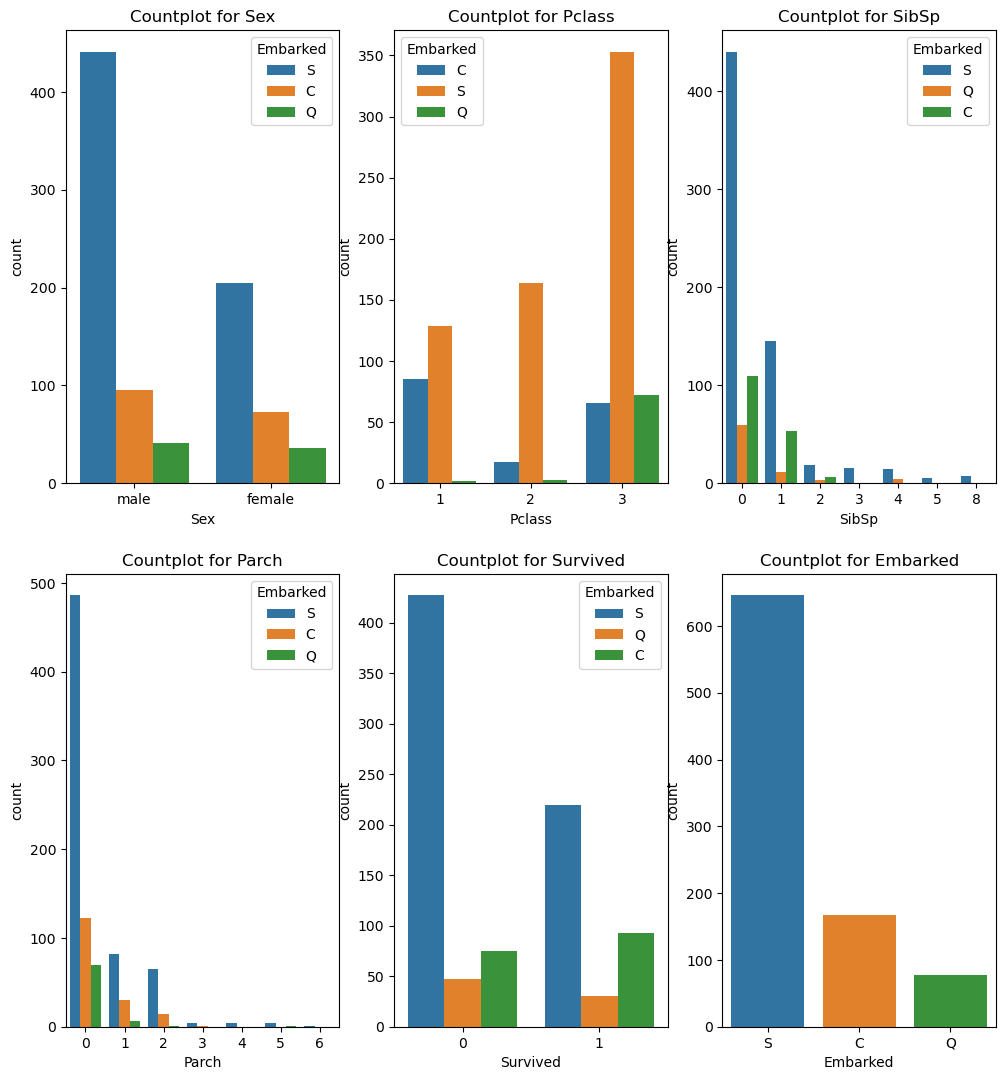

In [183]:
cols = ['Sex','Pclass','SibSp','Parch','Survived','Embarked']
plt.figure(figsize=(12,20))
for i in range(len(cols)):
    plt.subplot(3,3,i+1)
    sns.countplot(x=df[cols[i]],hue=df['Embarked'])
    plt.title(f'Countplot for {cols[i]}')

plt.show()

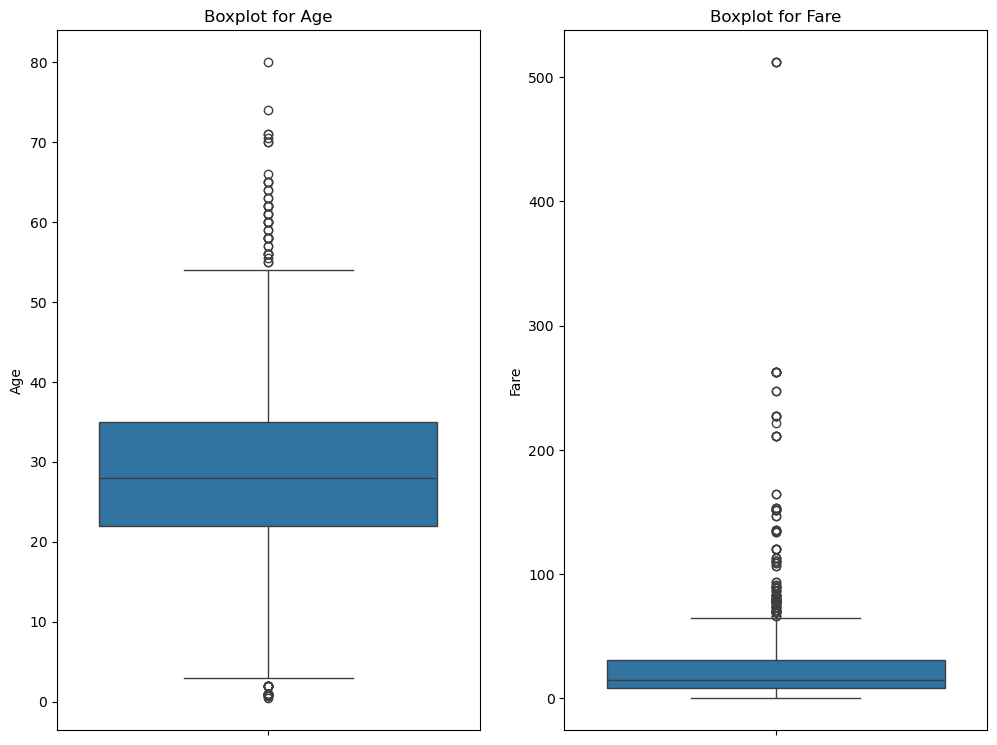

In [184]:
ncols = ['Age','Fare']
plt.figure(figsize=(12,20))
for i in range(len(ncols)):
    plt.subplot(2,2,i+1)
    sns.boxplot(y=df[ncols[i]])
    plt.title(f'Boxplot for {ncols[i]}')
plt.show()

In [185]:
a = df.describe(percentiles = [0.01,0.02,0.03,0.5,0.97,0.98,0.99]).T
a = a.iloc[:,3:]
a

,min,1%,2%,3%,50%,97%,98%,99%,max
PassengerId,1.00,9.9,18.8000,27.700,446.0000,864.30,8.732000e+02,8.821000e+02,8.910000e+02
Survived,0.00,0.0,0.0000,0.000,0.0000,1.00,1.000000e+00,1.000000e+00,1.000000e+00
Pclass,1.00,1.0,1.0000,1.000,3.0000,3.00,3.000000e+00,3.000000e+00,3.000000e+00
Age,0.42,1.0,2.0000,3.000,28.0000,59.00,6.200000e+01,6.500000e+01,8.000000e+01
SibSp,0.00,0.0,0.0000,0.000,0.0000,4.00,4.000000e+00,5.000000e+00,8.000000e+00
Parch,0.00,0.0,0.0000,0.000,0.0000,2.00,2.000000e+00,4.000000e+00,6.000000e+00
Fare,0.00,0.0,6.3975,6.975,14.4542,151.55,2.113375e+02,2.490062e+02,5.123292e+02
Ticket_num,0.00,2.0,3.0000,1596.200,110813.0000,3101273.20,3.101284e+06,3.101296e+06,3.101317e+06


In [186]:
def upper_outlier_teatment(x):
    x = x.clip(upper=x.quantile(0.98))
    return x

In [187]:
df[ncols] = df[ncols].apply(upper_outlier_teatment)

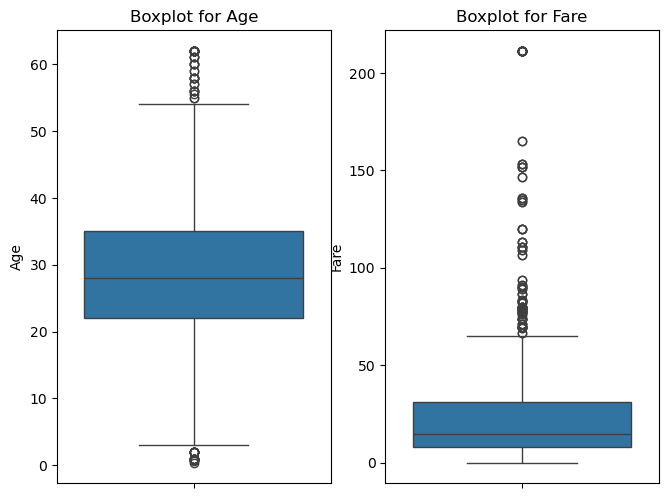

In [188]:
plt.figure(figsize=(12,20))
for i in range(len(ncols)):
    plt.subplot(3,3,i+1)
    sns.boxplot(y=df[ncols[i]])
    plt.title(f'Boxplot for {ncols[i]}')
plt.show()

In [189]:
col_fare = ['Fare']
def upper_outlier_teatment(x):
    x = x.clip(upper =x.quantile(0.90))
    return x

In [190]:
df[col_fare] = df[col_fare].apply(upper_outlier_teatment)

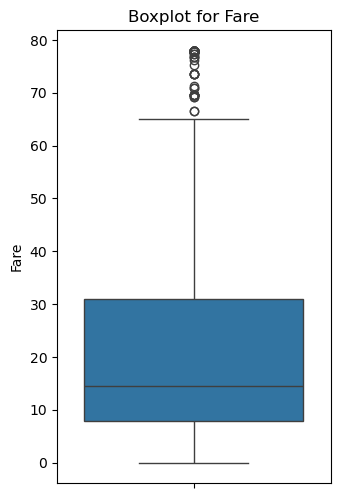

In [191]:
plt.figure(figsize=(12,20))
for i in range(len(col_fare)):
    plt.subplot(3,3,i+1)
    sns.boxplot(y=df[col_fare[i]])
    plt.title(f'Boxplot for {col_fare[i]}')
plt.show()

In [192]:
for i in cols:
    print(i,df[i].nunique())

Sex 2
Pclass 3
SibSp 7
Parch 7
Survived 2
Embarked 3


### Data Transform

In [193]:
cols = ['Sex','Pclass','SibSp','Parch','Embarked']

In [194]:
df_dum = pd.get_dummies(data=df,columns=cols,drop_first=True,dtype=int)
print(df_dum.shape)
print(df_dum.columns)

(891, 24)
Index(['PassengerId', 'Survived', 'Name', 'Age', 'Fare', 'Cabin', 'Ticket_num',
       'Sex_male', 'Pclass_2', 'Pclass_3', 'SibSp_1', 'SibSp_2', 'SibSp_3',
       'SibSp_4', 'SibSp_5', 'SibSp_8', 'Parch_1', 'Parch_2', 'Parch_3',
       'Parch_4', 'Parch_5', 'Parch_6', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [195]:
df_dum.head()

,PassengerId,Survived,Name,Age,Fare,Cabin,Ticket_num,Sex_male,Pclass_2,Pclass_3,...,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,7.2500,Others,21171,1,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,71.2833,C85,17599,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,7.9250,Others,3101282,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,53.1000,C123,113803,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,8.0500,Others,373450,1,0,1,...,0,0,0,0,0,0,0,0,0,1


In [197]:
x = df_dum.drop(['Name','Cabin','PassengerId'],axis=1)
y = df_dum['Survived']
print(x.shape)
print(y.shape)

(891, 21)
(891,)


In [198]:
from sklearn.model_selection import train_test_split

In [199]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(623, 21)
(268, 21)
(623,)
(268,)


In [205]:
from sklearn.metrics import*
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [210]:
def eval_model(model,x_train,x_test,y_train,y_test,mname):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    print(classification_report(y_test,ypred))
    train_acc = model.score(x_train,y_train)
    test_acc = model.score(x_test,y_test)
    pre1 = precision_score(y_test,ypred)
    rec1 = recall_score(y_test,ypred)
    pre0 = precision_score(y_test,ypred,pos_label=0)
    rec0 = recall_score(y_test,ypred,pos_label=0)
    res = pd.DataFrame({'Train_Acc':train_acc,'test_Acc':test_acc,
                       'Pre0':pre0,'Rec0':rec0,'Pre1':pre1,'Rec1':rec1,
                       },index=[mname])
    return res, ypred

In [211]:
lr1 = LogisticRegression(max_iter=1000)
lr1_res,ypred_lr1 = eval_model(lr1,x_train,x_test,y_train,y_test,'lr1')
lr1_res

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       173
           1       1.00      1.00      1.00        95

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268



,Train_Acc,test_Acc,Pre0,Rec0,Pre1,Rec1
lr1,1.0,1.0,1.0,1.0,1.0,1.0


In [216]:
y_pred = lr1.predict(x_test)
print(y_pred)

[0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 1 0 0 1 1 0 0 1 0
 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1
 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 1 1
 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1
 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0
 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1
 0 0 1 0 0 0 0 0 0]


### Model Saving

In [217]:
import pickle

In [218]:
pickle.dump(lr1,open('df_titanic','wb'))


In [219]:
model = pickle.load(open('df_titanic','rb'))